<a href="https://colab.research.google.com/github/MikolajKasprzyk/the_office/blob/main/the_office.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
path_in = '/content/drive/MyDrive/Colab Notebooks/the_office/'
path_out ='/content/drive/MyDrive/Colab Notebooks/the_office/viz_files/'

lines_raw = pd.read_csv(path_in + 'the_office_lines.csv')
episodes_raw = pd.read_csv(path_in + 'the_office_episodes.csv')
imdb_raw = pd.read_csv(path_in + 'the_office_imdb.csv')

In [4]:
episodes_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   season                 201 non-null    int64  
 1   episode_num_in_season  201 non-null    int64  
 2   episode_num_overall    201 non-null    int64  
 3   title                  201 non-null    object 
 4   directed_by            201 non-null    object 
 5   written_by             201 non-null    object 
 6   original_air_date      201 non-null    object 
 7   prod_code              201 non-null    int64  
 8   us_viewers             201 non-null    float64
dtypes: float64(1), int64(4), object(4)
memory usage: 14.3+ KB


In [131]:
episodes_raw

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,prod_code,us_viewers
0,1,1,1,Pilot,Ken Kwapis,Ricky Gervais & Stephen Merchant and Greg Daniels,2005-03-24,1001,11200000.0
1,1,2,2,Diversity Day,Ken Kwapis,B. J. Novak,2005-03-29,1002,6000000.0
2,1,3,3,Health Care,Ken Whittingham,Paul Lieberstein,2005-04-05,1006,5800000.0
3,1,4,4,The Alliance,Bryan Gordon,Michael Schur,2005-04-12,1004,5400000.0
4,1,5,5,Basketball,Greg Daniels,Greg Daniels,2005-04-19,1005,5000000.0
...,...,...,...,...,...,...,...,...,...
196,9,21,197,Livin' the Dream,Jeffrey Blitz,Niki Schwartz-Wright,2013-05-02,9021,3510000.0
197,9,22,198,A.A.R.M.,David Rogers,Brent Forrester,2013-05-09,9022,4560000.0
198,9,23,199,A.A.R.M.,David Rogers,Brent Forrester,2013-05-09,9023,4560000.0
199,9,24,200,Finale,Ken Kwapis,Greg Daniels,2013-05-16,9024,5690000.0


In [5]:
imdb_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season             188 non-null    int64  
 1   episode_num        188 non-null    int64  
 2   title              188 non-null    object 
 3   original_air_date  188 non-null    object 
 4   imdb_rating        188 non-null    float64
 5   total_votes        188 non-null    int64  
 6   desc               188 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 10.4+ KB


In [6]:
episodes_raw.tail()

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,prod_code,us_viewers
196,9,21,197,Livin' the Dream,Jeffrey Blitz,Niki Schwartz-Wright,2013-05-02,9021,3510000.0
197,9,22,198,A.A.R.M.,David Rogers,Brent Forrester,2013-05-09,9022,4560000.0
198,9,23,199,A.A.R.M.,David Rogers,Brent Forrester,2013-05-09,9023,4560000.0
199,9,24,200,Finale,Ken Kwapis,Greg Daniels,2013-05-16,9024,5690000.0
200,9,25,201,Finale,Ken Kwapis,Greg Daniels,2013-05-16,9025,5690000.0


In [7]:
temp_episodes_episodes = pd.DataFrame(episodes_raw.groupby(by='season')['episode_num_in_season'].unique())
temp_episodes_episodes

,episode_num_in_season
season,
1,"[1, 2, 3, 4, 5, 6]"
2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
4,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
5,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
6,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
7,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
8,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
9,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


In [8]:
temp_imdb_episodes = pd.DataFrame(imdb_raw.groupby(by='season')['episode_num'].unique())
temp_imdb_episodes

,episode_num
season,
1,"[1, 2, 3, 4, 5, 6]"
2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
4,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]"
5,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
6,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
7,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
8,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
9,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


# Clean episodes dataset

In [9]:
episodes_raw[episodes_raw.duplicated(subset='original_air_date')]

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,prod_code,us_viewers
38,3,11,39,A Benihana Christmas,Harold Ramis,Jennifer Celotta,2006-12-14,3014,8440000.0
52,3,25,53,The Job,Ken Kwapis,Paul Lieberstein & Michael Schur,2007-05-17,3024,7880000.0
54,4,2,55,Fun Run,Greg Daniels,Greg Daniels,2007-09-27,4002,9700000.0
56,4,4,57,Dunder Mifflin Infinity,Craig Zisk,Michael Schur,2007-10-04,4004,8490000.0
58,4,6,59,Launch Party,Ken Whittingham,Jennifer Celotta,2007-10-11,4006,8910000.0
60,4,8,61,Money,Paul Lieberstein,Paul Lieberstein,2007-10-18,4008,8500000.0
71,4,19,72,"Goodbye, Toby",Paul Feig,Jennifer Celotta & Paul Lieberstein,2008-05-15,4019,8070000.0
73,5,2,74,Weight Loss,Paul Feig,Lee Eisenberg & Gene Stupnitsky,2008-09-25,5002,9200000.0
86,5,15,87,Stress Relief,Jeffrey Blitz,Paul Lieberstein,2009-02-01,5017,22910000.0
94,5,23,95,Michael Scott Paper Company,Gene Stupnitsky,Justin Spitzer,2009-04-09,5023,7940000.0


In [10]:
# in this dataframe some episodes are divided no two, those are special longer episodes
# in other dataframes they are treated as one. if air date is same i will treat them as one
# as i found out later in project there are episodes with the same title,
# part 1 and 2 suffix and the same air date, there are separate episodes with
# the same air date but different titlte and part 1 and 2 suffixes and
# different air date. to be concistent through dataframe episodes with the same
# air date and part 1 and 2 suffixes will be treated as one episode
episodes = episodes_raw.copy()
episodes = episodes.drop(columns=['prod_code'])
# add column with first 5 characters in title
episodes['title_first_5'] = episodes['title'].str[:5]
episodes = episodes.drop_duplicates(subset=['original_air_date', 'title_first_5'])
episodes.reset_index(inplace=True, drop=True)
episodes = episodes.drop(columns='title_first_5')

In [11]:
# resetting numbering of episodes in every season
episodes = episodes.sort_values(by=['season', 'episode_num_in_season'])
episodes['episode_num_in_season'] = episodes.groupby('season').cumcount() + 1
episodes['episode_num_overall'] = episodes.index + 1

# Clean IMDB dataset

In [12]:
imdb_raw.head()

,season,episode_num,title,original_air_date,imdb_rating,total_votes,desc
0,1,1,Pilot,2005-03-24,7.4,7006,The premiere episode introduces the boss and s...
1,1,2,Diversity Day,2005-03-29,8.3,6902,Michael's off color remark puts a sensitivity ...
2,1,3,Health Care,2005-04-05,7.7,5756,Michael leaves Dwight in charge of picking the...
3,1,4,The Alliance,2005-04-12,8.0,5579,"Just for a laugh, Jim agrees to an alliance wi..."
4,1,5,Basketball,2005-04-19,8.4,6183,Michael and his staff challenge the warehouse ...


In [13]:
imdb_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season             188 non-null    int64  
 1   episode_num        188 non-null    int64  
 2   title              188 non-null    object 
 3   original_air_date  188 non-null    object 
 4   imdb_rating        188 non-null    float64
 5   total_votes        188 non-null    int64  
 6   desc               188 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 10.4+ KB


In [14]:
imdb_raw.isna().sum()

season               0
episode_num          0
title                0
original_air_date    0
imdb_rating          0
total_votes          0
desc                 0
dtype: int64

In [15]:
imdb_raw.duplicated().sum()

0

In [16]:
imdb = imdb_raw.copy()
imdb = imdb.drop(columns=['desc'])
imdb[imdb.duplicated(subset='original_air_date')]

,season,episode_num,title,original_air_date,imdb_rating,total_votes
85,5,21,Michael Scott Paper Company,2009-04-09,8.7,3946
95,6,5,Niagara: Part 2,2009-10-08,9.5,5122
108,6,18,The Delivery: Part 2,2010-03-04,8.5,3445
178,9,14,Vandalism,2013-01-31,7.4,2774


In [17]:
# delete duplicated episodes, reset numbering
imdb['title_first_5'] = imdb['title'].str[:5]
imdb = imdb.drop_duplicates(subset=['original_air_date', 'title_first_5'])
imdb.reset_index(inplace=True, drop=True)
imdb = imdb.sort_values(by=['season', 'episode_num'])
imdb['episode_num'] = imdb.groupby('season').cumcount() + 1
imdb = imdb.drop(columns=['title_first_5'])

# Check, unify names and merge



In [18]:
imdb.head()

,season,episode_num,title,original_air_date,imdb_rating,total_votes
0,1,1,Pilot,2005-03-24,7.4,7006
1,1,2,Diversity Day,2005-03-29,8.3,6902
2,1,3,Health Care,2005-04-05,7.7,5756
3,1,4,The Alliance,2005-04-12,8.0,5579
4,1,5,Basketball,2005-04-19,8.4,6183


In [19]:
episodes.head()

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,us_viewers
0,1,1,1,Pilot,Ken Kwapis,Ricky Gervais & Stephen Merchant and Greg Daniels,2005-03-24,11200000.0
1,1,2,2,Diversity Day,Ken Kwapis,B. J. Novak,2005-03-29,6000000.0
2,1,3,3,Health Care,Ken Whittingham,Paul Lieberstein,2005-04-05,5800000.0
3,1,4,4,The Alliance,Bryan Gordon,Michael Schur,2005-04-12,5400000.0
4,1,5,5,Basketball,Greg Daniels,Greg Daniels,2005-04-19,5000000.0


In [20]:
print(episodes.columns)
print(imdb_raw.columns)

Index(['season', 'episode_num_in_season', 'episode_num_overall', 'title',
       'directed_by', 'written_by', 'original_air_date', 'us_viewers'],
      dtype='object')
Index(['season', 'episode_num', 'title', 'original_air_date', 'imdb_rating',
       'total_votes', 'desc'],
      dtype='object')


In [21]:
# unify column names
episodes.columns = ['season', 'episode_num', 'episode_num_overall', 'title_episodes',
       'directed', 'written', 'original_air_date',
       'us_viewers']

In [22]:
# check if those dataframes (unique values of episodes per season) are the same
temp_imdb_episodes = pd.DataFrame(imdb.groupby(by='season')['episode_num'].unique())
temp_episodes_episodes = pd.DataFrame(episodes.groupby(by='season')['episode_num'].unique())
print(temp_imdb_episodes.equals(temp_episodes_episodes))

True


In [23]:
# merge
episodes_imdb = imdb.merge(episodes, on=['season', 'episode_num'], how='left')
episodes_imdb.head()

,season,episode_num,title,original_air_date_x,imdb_rating,total_votes,episode_num_overall,title_episodes,directed,written,original_air_date_y,us_viewers
0,1,1,Pilot,2005-03-24,7.4,7006,1,Pilot,Ken Kwapis,Ricky Gervais & Stephen Merchant and Greg Daniels,2005-03-24,11200000.0
1,1,2,Diversity Day,2005-03-29,8.3,6902,2,Diversity Day,Ken Kwapis,B. J. Novak,2005-03-29,6000000.0
2,1,3,Health Care,2005-04-05,7.7,5756,3,Health Care,Ken Whittingham,Paul Lieberstein,2005-04-05,5800000.0
3,1,4,The Alliance,2005-04-12,8.0,5579,4,The Alliance,Bryan Gordon,Michael Schur,2005-04-12,5400000.0
4,1,5,Basketball,2005-04-19,8.4,6183,5,Basketball,Greg Daniels,Greg Daniels,2005-04-19,5000000.0


In [24]:
# check if titles are the same, if so it looks fine
episodes_imdb[episodes_imdb['title'] != episodes_imdb['title_episodes']]

,season,episode_num,title,original_air_date_x,imdb_rating,total_votes,episode_num_overall,title_episodes,directed,written,original_air_date_y,us_viewers


In [25]:
episodes_imdb = episodes_imdb.drop(columns=['title_episodes',
                                            'original_air_date_y']).\
                rename(columns={'episode_num':'episode',
                                'original_air_date_x':'air_date',
                                'total_votes':'votes',
                                'imdb_rating':'rating'})
episodes_imdb.head()

,season,episode,title,air_date,rating,votes,episode_num_overall,directed,written,us_viewers
0,1,1,Pilot,2005-03-24,7.4,7006,1,Ken Kwapis,Ricky Gervais & Stephen Merchant and Greg Daniels,11200000.0
1,1,2,Diversity Day,2005-03-29,8.3,6902,2,Ken Kwapis,B. J. Novak,6000000.0
2,1,3,Health Care,2005-04-05,7.7,5756,3,Ken Whittingham,Paul Lieberstein,5800000.0
3,1,4,The Alliance,2005-04-12,8.0,5579,4,Bryan Gordon,Michael Schur,5400000.0
4,1,5,Basketball,2005-04-19,8.4,6183,5,Greg Daniels,Greg Daniels,5000000.0


In [26]:
episodes_imdb.reset_index(inplace=True, drop=True)
episodes_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   season               186 non-null    int64  
 1   episode              186 non-null    int64  
 2   title                186 non-null    object 
 3   air_date             186 non-null    object 
 4   rating               186 non-null    float64
 5   votes                186 non-null    int64  
 6   episode_num_overall  186 non-null    int64  
 7   directed             186 non-null    object 
 8   written              186 non-null    object 
 9   us_viewers           186 non-null    float64
dtypes: float64(2), int64(4), object(4)
memory usage: 14.7+ KB


# Cleaning lines dataset

In [27]:
lines_raw.head()

,season,episode,title,scene,speaker,line,Unnamed: 6
0,1,1,Pilot,1,Michael,All right Jim. Your quarterlies look very good...,NaN
1,1,1,Pilot,1,Jim,"Oh, I told you. I couldn't close it. So...",NaN
2,1,1,Pilot,1,Michael,So you've come to the master for guidance? Is ...,NaN
3,1,1,Pilot,1,Jim,"Actually, you called me in here, but yeah.",NaN
4,1,1,Pilot,1,Michael,"All right. Well, let me show you how it's done.",NaN


In [28]:
lines_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54626 entries, 0 to 54625
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   season      54626 non-null  int64 
 1   episode     54626 non-null  int64 
 2   title       54626 non-null  object
 3   scene       54626 non-null  int64 
 4   speaker     54626 non-null  object
 5   line        54626 non-null  object
 6   Unnamed: 6  17 non-null     object
dtypes: int64(3), object(4)
memory usage: 2.9+ MB


In [29]:
# not really sure what this column is but just drop it as it is not significiant
# amount of data anyway
lines_raw[lines_raw['Unnamed: 6'].notna()]

,season,episode,title,scene,speaker,line,Unnamed: 6
3505,2,8,Performance Review,565,Jan,I'm good,how are you?
3645,2,8,Performance Review,578,Jan,I'm heading back to New York,Alan and I will conduct your performance revi...
3666,2,8,Performance Review,579,Michael,Jan is not in a place where she feels she can ...,I'm good. I can go home now.
3913,2,9,E-Mail Surveillance,610,Kelly,I'm sorry guys,can we please not talk about paper? There's g...
8711,3,6,Diwali,1489,Pam,You say one more word,I'm stopping the car.
8883,3,7,Branch Closing,1526,Phyllis,We know the branch is closing,Michael told us.
15482,4,7,Money (Parts 1&2),2597,Darryl,I have my daughter tonight,we're renting Charlotte's Web.
19220,5,4,Baby Shower,3195,Oscar,She's got an Orbit,that's a twelve hundred dollar stroller.
20859,5,9,Frame Toby,3397,Ryan,That was your choice,don't put that on me. I'm just going on a lit...
21140,5,10,The Surplus,3421,Dwight,My... It's not my fault you don't understand G...,I've been telling you to take it for years!


In [30]:
lines_all = lines_raw.copy()
lines_all = lines_all.drop(columns=['Unnamed: 6'])
lines_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54626 entries, 0 to 54625
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   season   54626 non-null  int64 
 1   episode  54626 non-null  int64 
 2   title    54626 non-null  object
 3   scene    54626 non-null  int64 
 4   speaker  54626 non-null  object
 5   line     54626 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.5+ MB


In [31]:
# check if episodes and seasons are the same as episodes_imdb dataframe
temp_lines_episodes = pd.DataFrame(lines_all.groupby(by='season')['episode'].unique())
temp_lines_episodes

,episode
season,
1,"[1, 2, 3, 4, 5, 6]"
2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15..."
4,"[1, 3, 5, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17..."
5,"[1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1..."
6,"[1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1..."
7,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15..."
8,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
9,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


In [32]:
temp_episodes_imdb = pd.DataFrame(episodes_imdb.groupby(by='season')['episode'].unique())
temp_episodes_imdb

,episode
season,
1,"[1, 2, 3, 4, 5, 6]"
2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
4,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]"
5,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
6,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
7,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
8,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
9,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


In [33]:
# some of numbers in episodes numbering were skipped, like in here
pd.DataFrame(lines_all[lines_all['season'] == 4]).groupby(by='episode')['title'].unique()

episode
1                     [Fun Run (Parts 1&2)]
3     [Dunder Mifflin Infinity (Parts 1&2)]
5                [Launch Party (Parts 1&2)]
7                       [Money (Parts 1&2)]
9                                [Local Ad]
10                            [Branch Wars]
11                           [Survivor Man]
12                         [The Deposition]
13                           [Dinner Party]
14                            [Chair Model]
15                              [Night Out]
16                         [Did I Stutter?]
17                               [Job Fair]
18              [Goodbye, Toby (Parts 1&2)]
Name: title, dtype: object

In [34]:
# fixing episodes numbering using titles column
def fix_episode_number(group):
    last_title = ''
    counter = 0
    numbering_fixed = []
    for idx, row in group.iterrows():
        title = row['title']
        if title != last_title:
            counter += 1
        numbering_fixed.append(counter)
        last_title = title
    group['episode'] = numbering_fixed
    return group

lines = lines_all.groupby(['season']).apply(fix_episode_number)

<ipython-input-34-1a76ab5dd1b0>:15: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  lines = lines_all.groupby(['season']).apply(fix_episode_number)


In [35]:
# numbering is in order
temp_lines = pd.DataFrame(lines.groupby(by='season')['episode'].unique())
temp_lines

,episode
season,
1,"[1, 2, 3, 4, 5, 6]"
2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
4,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]"
5,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
6,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
7,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
8,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
9,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


In [36]:
temp_episodes_imdb = pd.DataFrame(episodes_imdb.groupby(by='season')['episode'].unique())
temp_episodes_imdb

,episode
season,
1,"[1, 2, 3, 4, 5, 6]"
2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
4,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]"
5,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
6,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
7,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
8,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
9,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


In [37]:
temp_episodes_imdb['episode'] = temp_episodes_imdb['episode'].apply(tuple)
temp_lines['episode'] = temp_lines['episode'].apply(tuple)

# Compare the dataframes and get the differences
temp_episodes_imdb.compare(temp_lines, keep_equal=False)

season


In [38]:
lines.reset_index(inplace=True, drop=True)

#Sentiment analysis using TextBlob

In [39]:
from textblob import TextBlob
def get_sentiment_score(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# sentiment analysis and add new columns to the lines lines
lines['sentiment_score'] = lines['line'].apply(get_sentiment_score)

In [40]:
lines.head()
lines.to_csv(path_out + 'lines.csv')

In [41]:
# Get the top 10 speakers based on their occurrence counts
top_10 = lines['speaker'].value_counts().nlargest(10).index

# keep only the rows with speakers in the 'top_10' list
lines = lines[lines['speaker'].isin(top_10)]

In [42]:
office_df = lines.merge(episodes_imdb, how='left', on=['season', 'episode'])

In [43]:
office_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39418 entries, 0 to 39417
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   season               39418 non-null  int64  
 1   episode              39418 non-null  int64  
 2   title_x              39418 non-null  object 
 3   scene                39418 non-null  int64  
 4   speaker              39418 non-null  object 
 5   line                 39418 non-null  object 
 6   sentiment_score      39418 non-null  float64
 7   title_y              39418 non-null  object 
 8   air_date             39418 non-null  object 
 9   rating               39418 non-null  float64
 10  votes                39418 non-null  int64  
 11  episode_num_overall  39418 non-null  int64  
 12  directed             39418 non-null  object 
 13  written              39418 non-null  object 
 14  us_viewers           39418 non-null  float64
dtypes: float64(3), int64(5), object(7)
m

In [44]:
office_df.head()
office_df.to_csv(path_out + 'office_df.csv')

In [45]:
office_df = office_df.drop(columns=['title_y'])
office_df = office_df.rename(columns={'title_x':'title'})

In [46]:
sentiment_by_episode = pd.DataFrame(office_df.groupby(by=['season', 'episode', 'episode_num_overall'])['sentiment_score'].mean())
sentiment_by_episode.reset_index(inplace=True)

sentiment_by_episode['rolling_avg'] = sentiment_by_episode['sentiment_score'].rolling(window=5, min_periods=1).mean()

In [47]:
sentiment_by_episode.head()

,season,episode,episode_num_overall,sentiment_score,rolling_avg
0,1,1,1,0.102062,0.102062
1,1,2,2,0.137915,0.119989
2,1,3,3,0.102472,0.114150
3,1,4,4,0.139774,0.120556
4,1,5,5,0.090940,0.114633


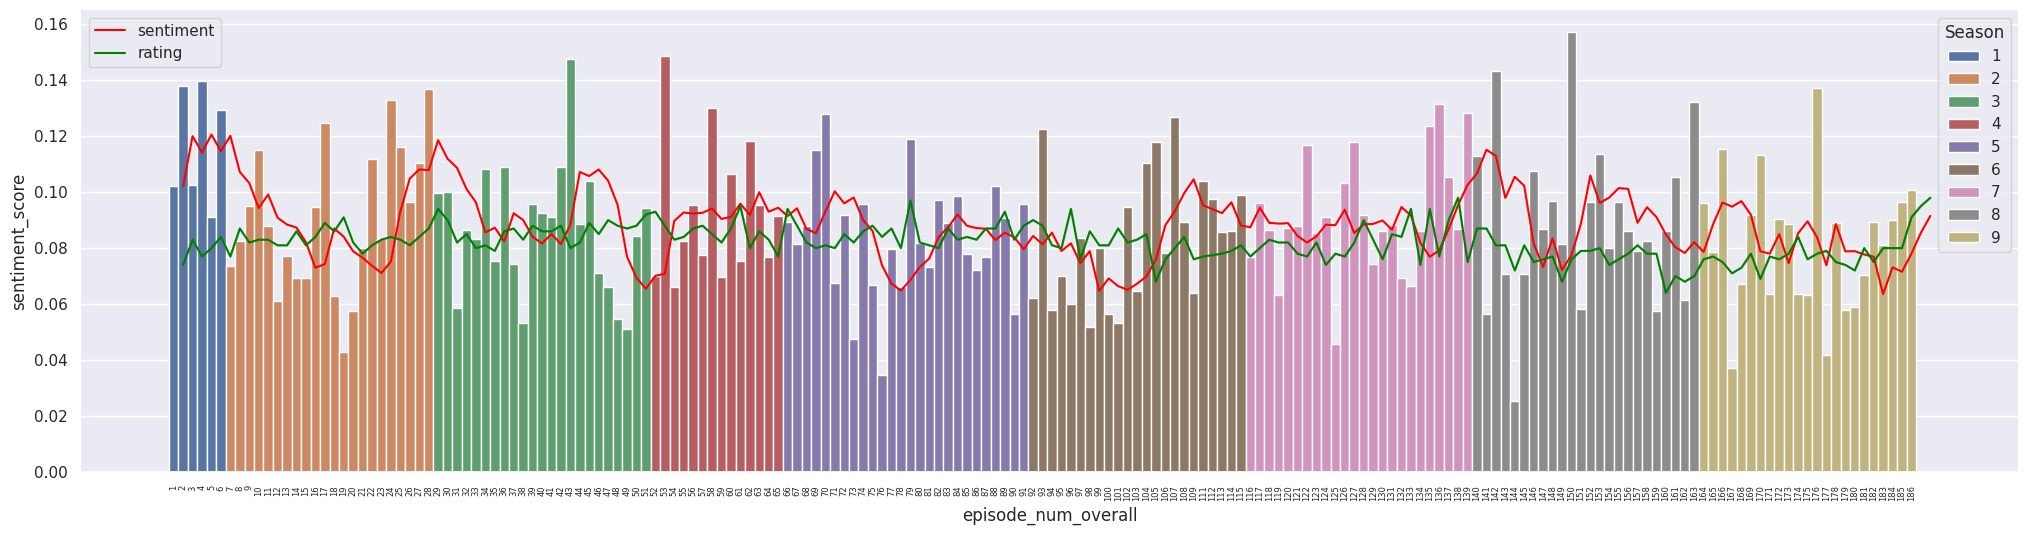

In [48]:
# check if there are some easy patterens between sentiment and rating
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

fig, ax = plt.subplots(figsize=(25, 6))
sns.barplot(data=sentiment_by_episode, x='episode_num_overall', y='sentiment_score', width=1, hue='season', dodge=False, ax=ax)
bar_legend = ax.legend(title='Season')
sns.lineplot(data=sentiment_by_episode, x='episode_num_overall', y='rolling_avg', color='red', label='sentiment', ax=ax)
sns.lineplot(data=office_df, x='episode_num_overall', y=office_df['rating']*0.01, color='green', label='rating', ax=ax)
plt.xticks(rotation=90, fontsize=6)

# Create a second legend for the line plots and specify its location
line_handles, line_labels = ax.get_legend_handles_labels()
ax.legend(line_handles[:2], line_labels[:2], loc='upper left')

# Add the bar plot legend back to the axis
ax.add_artist(bar_legend)

sns.despine(right=True, left=True)
plt.show()

In [49]:
sns.lineplot(data=office_df, x='episode_num_overall', y=office_df['rating']*0.001, color='red', ax=ax)

<Axes: xlabel='episode_num_overall', ylabel='sentiment_score'>

In [50]:
pd.DataFrame(office_df.groupby(by=['season', 'episode'])['speaker'].value_counts()).unstack(fill_value=0).reset_index()

season episode speaker                                                 \
speaker                   Andy Angela Dwight Erin Jim Kevin Michael Oscar Pam   
0            1       1       0      1     29    0  36     1      81     3  40   
1            1       2       0      4     17    0  25     8      75    13  12   
2            1       3       0      5     62    0  42     6      55     9  32   
3            1       4       0      7     47    0  49     3      68    14  22   
4            1       5       0      3     25    0  21     1     104     2  14   
..         ...     ...     ...    ...    ...  ...  ..   ...     ...   ...  ..   
180          9      19      31      2     58   10  15     5       0     7   9   
181          9      20      39     16     21   16  17    10       0     2  22   
182          9      21      68     30     54    9  63    13       0    19  30   
183          9      22      44     39     87   22  89    30       0    28  34   
184          9      23      31     23     76   11  73    31       2    18  45   

              
speaker Ryan  
0          8  
1          4  
2          1  
3          4  
4          8  
..       ...  
180        0  
181        0  
182        0  
183        0  
184       15  

[185 rows x 12 columns]

In [51]:
# Group by 'season', 'episode', and 'speaker', and calculate the value counts
speaker_counts = office_df.groupby(['season', 'episode', 'speaker']).size().reset_index(name='count')

# Pivot the DataFrame to get 'speaker' as columns and 'season' and 'episode' as the index
speaker_counts_pivot = speaker_counts.pivot(index=['season', 'episode'], columns='speaker', values='count')

# Fill NaN values with 0 for missing speaker counts
speaker_counts_pivot.fillna(0, inplace=True)

# Reset the index to get 'season' and 'episode' as columns instead of index
speaker_counts_pivot = speaker_counts_pivot.reset_index().rename_axis(None, axis=1)

In [52]:
speaker_counts_pivot

,season,episode,Andy,Angela,Dwight,Erin,Jim,Kevin,Michael,Oscar,Pam,Ryan
0,1,1,0.0,1.0,29.0,0.0,36.0,1.0,81.0,3.0,40.0,8.0
1,1,2,0.0,4.0,17.0,0.0,25.0,8.0,75.0,13.0,12.0,4.0
2,1,3,0.0,5.0,62.0,0.0,42.0,6.0,55.0,9.0,32.0,1.0
3,1,4,0.0,7.0,47.0,0.0,49.0,3.0,68.0,14.0,22.0,4.0
4,1,5,0.0,3.0,25.0,0.0,21.0,1.0,104.0,2.0,14.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
180,9,19,31.0,2.0,58.0,10.0,15.0,5.0,0.0,7.0,9.0,0.0
181,9,20,39.0,16.0,21.0,16.0,17.0,10.0,0.0,2.0,22.0,0.0
182,9,21,68.0,30.0,54.0,9.0,63.0,13.0,0.0,19.0,30.0,0.0
183,9,22,44.0,39.0,87.0,22.0,89.0,30.0,0.0,28.0,34.0,0.0


In [55]:
office_df.columns

Index(['season', 'episode', 'title', 'scene', 'speaker', 'line',
       'sentiment_score', 'air_date', 'rating', 'votes', 'episode_num_overall',
       'directed', 'written', 'us_viewers'],
      dtype='object')

In [56]:
episodes_data = office_df.groupby(['season', 'episode'])[['title',
                'air_date', 'rating', 'votes', 'directed', 'written',
                'us_viewers']].first().reset_index()
episodes_data

,season,episode,title,air_date,rating,votes,directed,written,us_viewers
0,1,1,Pilot,2005-03-24,7.4,7006,Ken Kwapis,Ricky Gervais & Stephen Merchant and Greg Daniels,11200000.0
1,1,2,Diversity Day,2005-03-29,8.3,6902,Ken Kwapis,B. J. Novak,6000000.0
2,1,3,Health Care,2005-04-05,7.7,5756,Ken Whittingham,Paul Lieberstein,5800000.0
3,1,4,The Alliance,2005-04-12,8.0,5579,Bryan Gordon,Michael Schur,5400000.0
4,1,5,Basketball,2005-04-19,8.4,6183,Greg Daniels,Greg Daniels,5000000.0
...,...,...,...,...,...,...,...,...,...
180,9,19,Stairmageddon,2013-04-11,8.0,2961,Matt Sohn,Dan Sterling,3830000.0
181,9,20,Paper Airplane,2013-04-25,8.0,3040,Jesse Peretz,Halsted Sullivan & Warren Lieberstein,3250000.0
182,9,21,Livin' the Dream,2013-05-02,9.1,4448,Jeffrey Blitz,Niki Schwartz-Wright,3510000.0
183,9,22,A.A.R.M,2013-05-09,9.5,5930,David Rogers,Brent Forrester,4560000.0


In [97]:
final_df = episodes_data\
        .merge(sentiment_by_episode, how='left', on=['season', 'episode'])\
        .merge(speaker_counts_pivot, how='left', on=['season', 'episode'])

In [ ]:
final_df

In [ ]:
final_df.info()

In [ ]:
final_df.columns

In [86]:
# Filter rows with 'title' containing 'Parts' and divide the specified columns by 2
# as those are double episodes so there is supposedly twice as much dialog
columns_to_modify = ['Andy', 'Angela', 'Dwight', 'Erin', 'Jim', 'Kevin', 'Michael', 'Oscar', 'Pam', 'Ryan']
final_df.loc[final_df['title'].str.contains('Parts 1&2', case=False), columns_to_modify] = final_df.loc[final_df['title'].str.contains('Parts', case=False), columns_to_modify]/2

In [98]:
final_df = final_df.rename(columns={'rating':'RATING', 'votes':'VOTES', 'us_viewers':'US VIEWERS', 'sentiment_score':'SENTIMENT'})

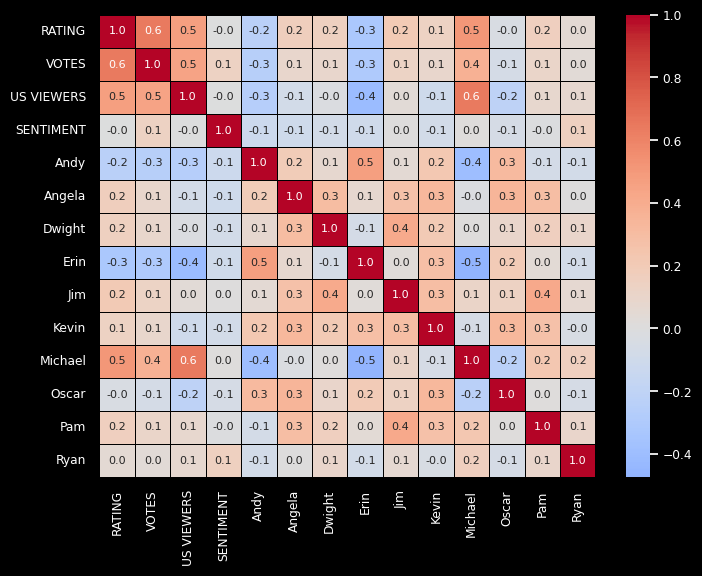

In [127]:
# calculate the correlation matrix on the numeric columns
corr = final_df[['RATING', 'VOTES', 'US VIEWERS',
                'SENTIMENT', 'Andy', 'Angela', 'Dwight', 'Erin', 'Jim',
                'Kevin', 'Michael', 'Oscar', 'Pam', 'Ryan']].corr()

custom_style = {'axes.labelcolor': 'white',
                'xtick.color': 'white',
                'ytick.color': 'white',
                'figure.facecolor':'black'}

sns.set_style(rc=custom_style)
plt.figure(figsize=(8, 6))
# plot the heatmap
sns.heatmap(corr, annot=True, fmt=".1f", cmap="coolwarm", center=0, annot_kws={"size": 8}, linewidths=0.5, linecolor='black')

plt.show()

In [101]:
rating_df = final_df.copy()
rating_df.head()

,season,episode,title,air_date,RATING,VOTES,directed,written,US VIEWERS,episode_num_overall,...,Andy,Angela,Dwight,Erin,Jim,Kevin,Michael,Oscar,Pam,Ryan
0,1,1,Pilot,2005-03-24,7.4,7006,Ken Kwapis,Ricky Gervais & Stephen Merchant and Greg Daniels,11200000.0,1,...,0.0,1.0,29.0,0.0,36.0,1.0,81.0,3.0,40.0,8.0
1,1,2,Diversity Day,2005-03-29,8.3,6902,Ken Kwapis,B. J. Novak,6000000.0,2,...,0.0,4.0,17.0,0.0,25.0,8.0,75.0,13.0,12.0,4.0
2,1,3,Health Care,2005-04-05,7.7,5756,Ken Whittingham,Paul Lieberstein,5800000.0,3,...,0.0,5.0,62.0,0.0,42.0,6.0,55.0,9.0,32.0,1.0
3,1,4,The Alliance,2005-04-12,8.0,5579,Bryan Gordon,Michael Schur,5400000.0,4,...,0.0,7.0,47.0,0.0,49.0,3.0,68.0,14.0,22.0,4.0
4,1,5,Basketball,2005-04-19,8.4,6183,Greg Daniels,Greg Daniels,5000000.0,5,...,0.0,3.0,25.0,0.0,21.0,1.0,104.0,2.0,14.0,8.0


In [114]:
rating_df['most_lines'] = rating_df[['Andy', 'Angela', 'Dwight', 'Erin', 'Jim', 'Kevin', 'Michael', 'Oscar', 'Pam', 'Ryan']].idxmax(axis=1)
rating_df = rating_df.drop(columns=['rolling_avg', 'Andy', 'Angela', 'Dwight',
                                    'Erin', 'Jim', 'Kevin', 'Michael', 'Oscar',
                                    'Pam', 'Ryan'])
rating_df.head()

,season,episode,title,air_date,RATING,VOTES,directed,written,US VIEWERS,episode_num_overall,SENTIMENT,most_lines
0,1,1,Pilot,2005-03-24,7.4,7006,Ken Kwapis,Ricky Gervais & Stephen Merchant and Greg Daniels,11200000.0,1,0.102062,Michael
1,1,2,Diversity Day,2005-03-29,8.3,6902,Ken Kwapis,B. J. Novak,6000000.0,2,0.137915,Michael
2,1,3,Health Care,2005-04-05,7.7,5756,Ken Whittingham,Paul Lieberstein,5800000.0,3,0.102472,Dwight
3,1,4,The Alliance,2005-04-12,8.0,5579,Bryan Gordon,Michael Schur,5400000.0,4,0.139774,Michael
4,1,5,Basketball,2005-04-19,8.4,6183,Greg Daniels,Greg Daniels,5000000.0,5,0.090940,Michael


In [129]:
rating_df

,season,episode,title,air_date,RATING,VOTES,directed,written,US VIEWERS,episode_num_overall,SENTIMENT,most_lines
0,1,1,Pilot,2005-03-24,7.4,7006,Ken Kwapis,Ricky Gervais & Stephen Merchant and Greg Daniels,11200000.0,1,0.102062,Michael
1,1,2,Diversity Day,2005-03-29,8.3,6902,Ken Kwapis,B. J. Novak,6000000.0,2,0.137915,Michael
2,1,3,Health Care,2005-04-05,7.7,5756,Ken Whittingham,Paul Lieberstein,5800000.0,3,0.102472,Dwight
3,1,4,The Alliance,2005-04-12,8.0,5579,Bryan Gordon,Michael Schur,5400000.0,4,0.139774,Michael
4,1,5,Basketball,2005-04-19,8.4,6183,Greg Daniels,Greg Daniels,5000000.0,5,0.090940,Michael
...,...,...,...,...,...,...,...,...,...,...,...,...
180,9,19,Stairmageddon,2013-04-11,8.0,2961,Matt Sohn,Dan Sterling,3830000.0,182,0.089282,Dwight
181,9,20,Paper Airplane,2013-04-25,8.0,3040,Jesse Peretz,Halsted Sullivan & Warren Lieberstein,3250000.0,183,0.081069,Andy
182,9,21,Livin' the Dream,2013-05-02,9.1,4448,Jeffrey Blitz,Niki Schwartz-Wright,3510000.0,184,0.090098,Andy
183,9,22,A.A.R.M,2013-05-09,9.5,5930,David Rogers,Brent Forrester,4560000.0,185,0.096317,Jim


In [115]:
rating_df.to_csv(path_out + 'rating_df.csv')

In [63]:
# as we can see sentiment score doesnt look to be correlated to anything
# we can check mean setiment for characters
sentiment_character = office_df.groupby(['speaker'])['sentiment_score'].mean().reset_index(name='sentiment_score')
sentiment_character

,speaker,sentiment_score
0,Andy,0.076272
1,Angela,0.042056
2,Dwight,0.076366
3,Erin,0.069140
4,Jim,0.099350
5,Kevin,0.059850
6,Michael,0.105070
7,Oscar,0.061004
8,Pam,0.091557
9,Ryan,0.097008


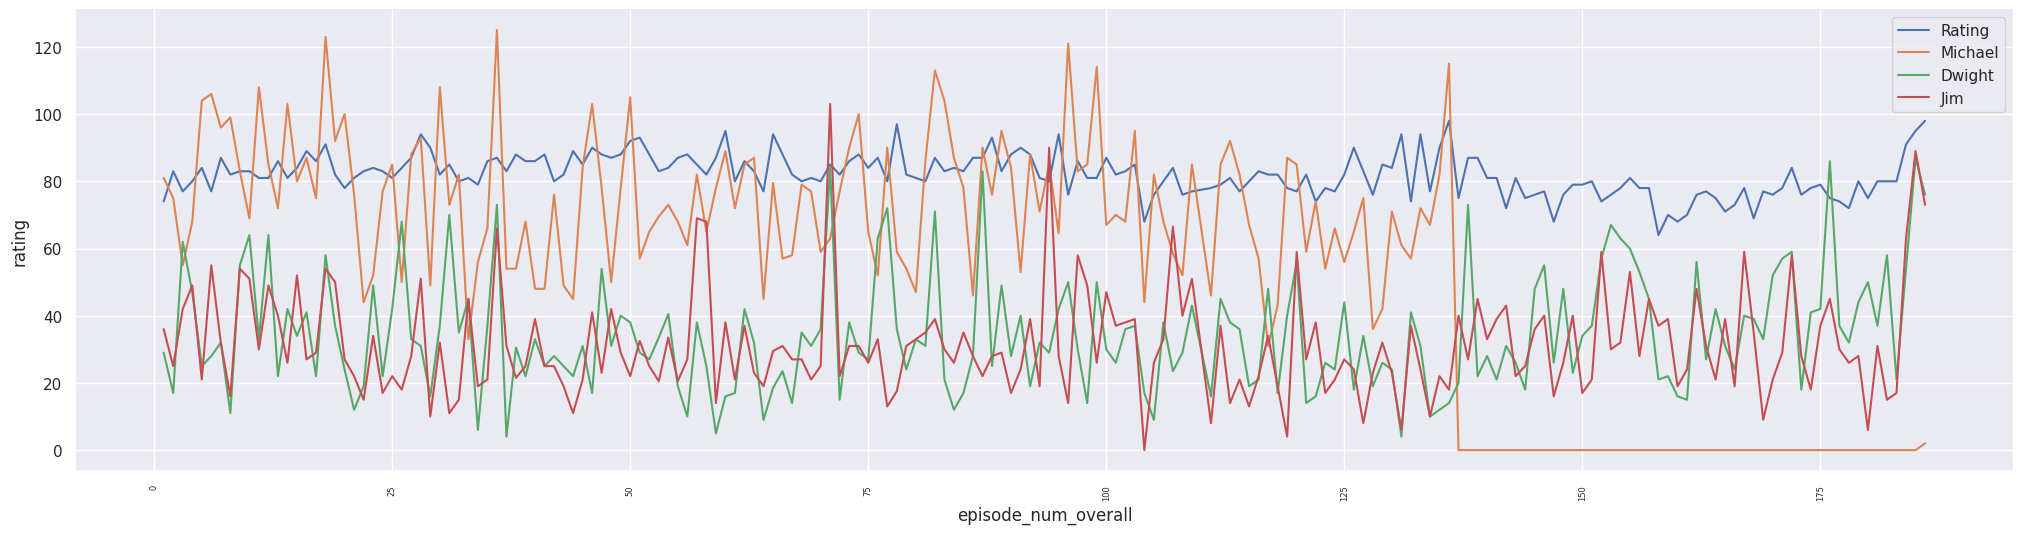

In [64]:
fig, ax = plt.subplots(figsize=(25, 6))

sns.lineplot(data=final_df, x='episode_num_overall', y=final_df['rating']*10, label='Rating', ax=ax)
sns.lineplot(data=final_df, x='episode_num_overall', y='Michael', label='Michael',ax=ax)
sns.lineplot(data=final_df, x='episode_num_overall', y='Dwight', label='Dwight', ax=ax)
sns.lineplot(data=final_df, x='episode_num_overall', y='Jim', label='Jim', ax=ax)
plt.xticks(rotation=90, fontsize=6)

sns.despine(right=True, left=True)
plt.show()

In [65]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots with 2 rows and 1 column (2 plots vertically stacked)
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1, row_heights=[0.7, 0.3])

# Add line plots to the first subplot (row=1, col=1)
fig.add_trace(go.Scatter(
    x=final_df['episode_num_overall'],
    y=final_df['Michael'],
    name='Michael',
    customdata=np.stack((final_df['season'],
                         final_df['episode'],
                         final_df['title'],
                         final_df['rating']), axis=-1),
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=final_df['episode_num_overall'],
    y=final_df['Dwight'],
    name='Dwight',
    customdata=np.stack((final_df['season'],
                         final_df['episode'],
                         final_df['title'],
                         final_df['rating']), axis=-1),
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=final_df['episode_num_overall'],
    y=final_df['Jim'],
    name='Jim',
    customdata=np.stack((final_df['season'],
                         final_df['episode'],
                         final_df['title'],
                         final_df['rating']), axis=-1),
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=final_df['episode_num_overall'],
    y=final_df['Pam'],
    name='Pam',
    customdata=np.stack((final_df['season'],
                         final_df['episode'],
                         final_df['title'],
                         final_df['rating']), axis=-1),
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=final_df['episode_num_overall'],
    y=final_df['Andy'],
    name='Andy',
    customdata=np.stack((final_df['season'],
                         final_df['episode'],
                         final_df['title'],
                         final_df['rating']), axis=-1),
), row=1, col=1)

# Add bar chart to the second subplot (row=2, col=1)
fig.add_trace(go.Bar(
    x=final_df['episode_num_overall'],
    y=final_df['rating'],
    name='Rating',
    customdata=np.stack((final_df['season'],
                         final_df['episode'],
                         final_df['title'],
                         final_df['rating']), axis=-1),
), row=2, col=1)

# Update hover template for both subplots
fig.update_traces(hovertemplate="<br>".join(['Season: %{customdata[0]}',
                                            'Episode: %{customdata[1]}',
                                            'Title: %{customdata[2]}',
                                            'Rating: %{customdata[3]}']), selector=dict(type='scatter'))

fig.update_traces(hovertemplate="<br>".join(['Season: %{customdata[0]}',
                                            'Episode: %{customdata[1]}',
                                            'Title: %{customdata[2]}',
                                            'Rating: %{customdata[3]}']), selector=dict(type='bar'))

# Update layout for both subplots
fig.update_layout(
    title_text='Count of lines per character in episodes',
    xaxis=dict(title=''),
    yaxis=dict(title='Count of lines in episode'),
    xaxis2=dict(title='Episode'),
    yaxis2=dict(title='Rating')
)

# Update the height of the second subplot to make it smaller
fig.update_layout(height=800)

fig.show()



In [66]:
# that's what she said
thats_what = lines_all[lines_all['line'].str.contains('what she sai', case=False)]

# setup
setup = lines_all.loc[lines_all.index[thats_what.index-1]].reset_index(drop=True).rename(columns={'line':'setup', 'speaker':'setup_speaker'})
thats_what = thats_what.reset_index(drop=True)
thats_what[['setup', 'setup_speaker']] = setup[['setup', 'setup_speaker']]
# drop lines whre the is no joke, but reffering to one
thats_what = thats_what.sort_values(by=['season', 'episode']).drop([2, 21]).reset_index(drop=True)
thats_what['ocuurence_in_season'] = thats_what.groupby('season').cumcount() + 1
thats_what.to_csv(path_out + 'thats_what.csv')
thats_what

,season,episode,title,scene,speaker,line,setup,setup_speaker,ocuurence_in_season
0,2,2,Sexual Harassment,306,Michael,That's what she said. Pam?,"No, thanks. I'm good.",Jim,1
1,2,2,Sexual Harassment,306,Michael,"That's what she sai Nope, but... Okay. Well, ...",Uh... my mother's coming.,Pam,2
2,2,2,Sexual Harassment,316,Michael,THAT'S WHAT SHE SAID!,Wow! That is really hard. You really think you...,Jim,3
3,2,10,Christmas Party,621,Michael,"A, that's what she said, and B, I wanted it to...","Well, sort of. Why did you get it so big?",Kevin,4
4,2,12,The Injury,752,Dwight,That's what she said.,Does the skin look red and swollen?,Doctor,5
5,2,17,Dwight's Speech,953,Michael,That's what she said!,I have a ton of stuff to do for the wedding. A...,Pam,6
6,2,21,Conflict Resolution,1128,Michael,"That's what she said. The thing is, Angela......",You already did me.,Angela,7
7,3,1,Gay Witch Hunt,1264,Michael,I am glad that today spurred social change. Th...,We are not in the playground anymore. There ar...,Michael,1
8,3,10,A Benihana Christmas (Parts 1&2),1683,Michael,Oh. That's what she said.,"Thanks! I, I wanna give you something.",Second Cindy,2
9,3,13,Traveling Salesmen,1781,Dwight,That's what she said.,"Ok, you know what? I want you to think about y...",Michael,3


In [67]:
thats_what['speaker'].unique()

array(['Michael', 'Dwight', 'Jan', 'Jim', 'Pam', 'David', 'Holly',
       'Creed'], dtype=object)

In [68]:
dwight_bear = lines[lines['line'].str.contains('bear', case=False) & (lines_raw['speaker'] == 'Dwight')]
dwight_beet = lines[lines['line'].str.contains('beet', case=False) & (lines_raw['speaker'] == 'Dwight')]
dwight_bear.reset_index()

<ipython-input-68-90d9b203cec0>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-68-90d9b203cec0>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,index,season,episode,title,scene,speaker,line,sentiment_score
0,6252,2,18,Take Your Daughter to Work Day,1030,Dwight,The Schrutes consider children very valuable. ...,-0.060000
1,11102,3,15,Phyllis' Wedding,1900,Dwight,I saw Wedding Crashers accidentally. I bought ...,-0.433333
2,12011,3,18,The Negotiation,2070,Dwight,Please. They hand these out to little kids. Lo...,-0.187500
3,12063,3,19,Safety Training,2083,Dwight,"Ok, no. Jim, tell him that bears can climb fas...",0.781250
4,12325,3,20,Product Recall,2117,Dwight,Bears do not--- What is going on--- What are y...,0.000000
5,14557,4,2,Dunder Mifflin Infinity (Parts 1&2),2464,Dwight,"Wait wait wait! No no no! It means bear right,...",0.285714
6,14714,4,3,Launch Party (Parts 1&2),2487,Dwight,Go to my car. Open the trunk. Inside you will ...,0.250000
7,15172,4,3,Launch Party (Parts 1&2),2545,Dwight,"Now I've got a beard, and I can do whatever I ...",0.000000
8,16963,4,10,Chair Model,2843,Dwight,"I wrote that. Michael, you shouldn't have to s...",0.000000
9,20758,5,8,Frame Toby,3388,Dwight,Oh I've framed animals before. I framed a racc...,0.000000


In [69]:
lines[lines['line'].str.contains('fact', case=False) & (lines_raw['speaker'] == 'Dwight')]

<ipython-input-69-ba5210f9d792>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,season,episode,title,scene,speaker,line,sentiment_score
585,1,3,Health Care,94,Dwight,...the fact...,0.000000
2753,2,5,Halloween,450,Dwight,"Would I ever leave this company? Look, I'm all...",0.386667
3734,2,9,E-Mail Surveillance,593,Dwight,I think one of the greatest things about moder...,0.257407
4916,2,13,The Secret,775,Dwight,"Oh, really nothing? Fact: You are drinking gra...",0.200000
9087,3,8,The Merger,1561,Dwight,Fact - I am older. I am wiser. Do not mess wit...,0.127083
14686,4,3,Launch Party (Parts 1&2),2482,Dwight,I can make more sales than a computer. In fact...,0.500000
15358,4,4,Money (Parts 1&2),2585,Dwight,Is everything satisfactory with your stay?,0.000000
22509,5,14,Lecture Circuit (Part 1),3621,Dwight,It's a statement of fact.,0.000000
23089,5,16,Blood Drive,3691,Dwight,You shouldn't believe everything you hear. In ...,0.400000
23378,5,17,Golden Ticket,3731,Dwight,We discussed the fact that I'm cooped up here ...,0.050000


In [70]:
# drop rows where word 'bear' is not ralted to animal
dwight_bear = dwight_bear.drop(dwight_bear.index[[0, 7, 8, 12, 13, 14]]).reset_index(drop=True)
# add category name to make vizualisation easier
dwight_bear['category'] = 'bear'

dwight_beet = dwight_beet.reset_index(drop=True)
dwight_beet['category'] = 'beet'

dwight_bear_beet = dwight_bear.merge(dwight_beet, how='outer')
dwight_bear_beet = dwight_bear_beet.sort_values(by=['season', 'episode']).reset_index(drop=True)
dwight_bear_beet['ocuurence in season'] = dwight_bear_beet.groupby('season').cumcount() + 1
dwight_bear_beet

,season,episode,title,scene,speaker,line,sentiment_score,category,ocuurence in season
0,2,3,Office Olympics,341,Dwight,"Actually, I do own property. My grandfather le...",0.202500,beet,1
1,2,3,Office Olympics,368,Dwight,You know you can always refinance your mortgag...,0.100000,beet,2
2,2,3,Office Olympics,368,Dwight,People love beets.,0.500000,beet,3
3,2,3,Office Olympics,368,Dwight,Everybody loves beets.,0.000000,beet,4
4,2,4,The Fire,398,Dwight,"...hollowed out, inside: waterproof matches, i...",-0.500000,beet,5
5,3,5,Initiation,1414,Dwight,"I hold in my hand, a beet seed. Take it. AH! ...",0.000000,beet,1
6,3,5,Initiation,1427,Dwight,It is time for your next test. You have plante...,-0.050000,beet,2
7,3,15,Phyllis' Wedding,1900,Dwight,I saw Wedding Crashers accidentally. I bought ...,-0.433333,bear,3
8,3,18,The Negotiation,2070,Dwight,Please. They hand these out to little kids. Lo...,-0.187500,bear,4
9,3,19,Safety Training,2083,Dwight,"Ok, no. Jim, tell him that bears can climb fas...",0.781250,bear,5


In [71]:
# export to csv to use in Tableau
dwight_bear_beet.to_csv(path_out + 'dwight_bear_beet.csv')

In [72]:
from collections import Counter
import re

# Combine all lines into a single string
dwight_lines = lines_raw[lines_raw['speaker'] == 'Dwight']
dwight_lines = ' '.join(dwight_lines['line'])

# Tokenize the string into individual words
words = re.findall(r'\w+', dwight_lines.lower())  # Convert to lowercase for case-insensitive count

# Count the occurrences of each word
word_counts = Counter(words)

word_counts_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Count'])

# Sort the DataFrame by count in descending order
word_counts_df = word_counts_df.sort_values(by='Count', ascending=False)

word_counts_df[word_counts_df['Word'] == 'pig']


,Word,Count
2268,pig,9


In [73]:
# we check top 10 characters with most lines in dataset (lines df is filtered)
# check how many shared scenes every pair of characters have

# which characters are in every scene
speaker_scene = lines.groupby(['scene', 'speaker']).size().reset_index().drop(columns=0)
# tuple of characters in every scene
speaker_pairs = pd.DataFrame(speaker_scene.groupby('scene')['speaker'].unique())
# get all possible combinations of speakers in each scene
from itertools import combinations

combinations_list = [list(combinations(names, 2)) for names in speaker_pairs['speaker']]

# flatten the list of combinations
all_combinations = [item for sublist in combinations_list for item in sublist]

# count the occurrences of each pair in the list
pair_counts = pd.Series(all_combinations).value_counts().reset_index()
pair_counts.columns = ['speaker_pair', 'Count']

# add column for each character in pair
pair_counts['speaker_1'] = pair_counts['speaker_pair'].apply(lambda x: x[0])
pair_counts['speaker_2'] = pair_counts['speaker_pair'].apply(lambda x: x[1])
pair_counts

,speaker_pair,Count,speaker_1,speaker_2
0,"(Jim, Pam)",759,Jim,Pam
1,"(Dwight, Michael)",664,Dwight,Michael
2,"(Dwight, Jim)",644,Dwight,Jim
3,"(Michael, Pam)",496,Michael,Pam
4,"(Jim, Michael)",466,Jim,Michael
5,"(Dwight, Pam)",368,Dwight,Pam
6,"(Andy, Dwight)",311,Andy,Dwight
7,"(Andy, Jim)",284,Andy,Jim
8,"(Angela, Dwight)",271,Angela,Dwight
9,"(Kevin, Michael)",231,Kevin,Michael


In [74]:
pair_counts.to_csv(path_out + 'pair_counts.csv')

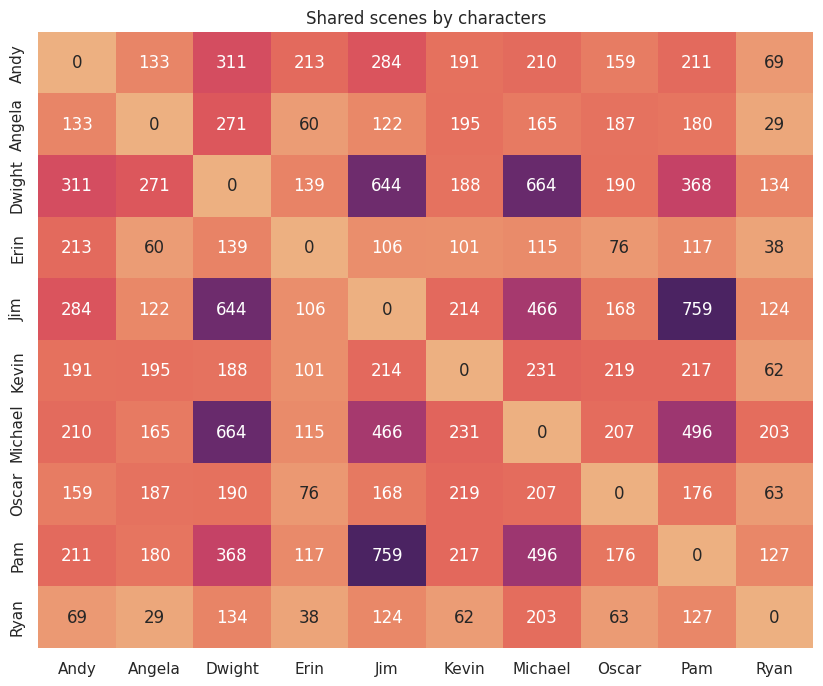

In [75]:
# create data for heatmap with pairs of characters and number of shared scenes
pair_counts_swapped = pair_counts.copy()
# create swapped dataframe for second half of heatmap
pair_counts_swapped[['speaker_1', 'speaker_2']] = pair_counts_swapped[['speaker_2', 'speaker_1']]

# concatenate the original DataFrame with the swapped copy
combined_pair_counts = pd.concat([pair_counts, pair_counts_swapped], ignore_index=True)

# Step 3: Create the pivot table from the combined DataFrame
heatmap_data = combined_pair_counts.pivot(index='speaker_1', columns='speaker_2', values='Count')

# Optional: Fill NaN values with 0
heatmap_data.fillna(0, inplace=True)

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='flare', cbar=False)
plt.xlabel('')
plt.ylabel('')
plt.title('Shared scenes by characters')
plt.show()

In [76]:
pair_counts

,speaker_pair,Count,speaker_1,speaker_2
0,"(Jim, Pam)",759,Jim,Pam
1,"(Dwight, Michael)",664,Dwight,Michael
2,"(Dwight, Jim)",644,Dwight,Jim
3,"(Michael, Pam)",496,Michael,Pam
4,"(Jim, Michael)",466,Jim,Michael
5,"(Dwight, Pam)",368,Dwight,Pam
6,"(Andy, Dwight)",311,Andy,Dwight
7,"(Andy, Jim)",284,Andy,Jim
8,"(Angela, Dwight)",271,Angela,Dwight
9,"(Kevin, Michael)",231,Kevin,Michael


In [77]:
print('\n'.join(map(str, pair_counts['Count'].values)))

759
664
644
496
466
368
311
284
271
231
219
217
214
213
211
210
207
203
195
191
190
188
187
180
176
168
165
159
139
134
133
127
124
122
117
115
106
101
76
69
63
62
60
38
29


## Chord diagram with Holoviews

In [78]:
#preparing specifit dataframes for chord diagram
# preparing nodes dataframe
unique_speakers = set(pair_counts['speaker_1']).union(set(pair_counts['speaker_2']))
# create group for every character
speaker_group_mapping = {name: i for i, name in enumerate(unique_speakers, start=1)}
# reate the 'nodes' DataFrame with 'name' and 'group' columns
nodes = pd.DataFrame({'name': list(unique_speakers), 'group': [speaker_group_mapping[name] for name in unique_speakers]})
nodes = nodes.reset_index()
print(nodes)

   index     name  group
0      0      Jim      1
1      1   Angela      2
2      2    Oscar      3
3      3     Ryan      4
4      4  Michael      5
5      5   Dwight      6
6      6     Erin      7
7      7    Kevin      8
8      8      Pam      9
9      9     Andy     10


In [79]:
# prepare links dataframe with characters and count of their shared scenes
links = pd.DataFrame()
# map index from nodes df to names
links['source'] = pair_counts['speaker_1'].apply(lambda x: nodes[nodes['name'] == x].index[0])
links['target'] = pair_counts['speaker_2'].apply(lambda x: nodes[nodes['name'] == x].index[0])
links['value'] = pair_counts['Count']
links

,source,target,value
0,0,8,759
1,5,4,664
2,5,0,644
3,4,8,496
4,0,4,466
5,5,8,368
6,9,5,311
7,9,0,284
8,1,5,271
9,7,4,231


In [80]:
!pip install holoviews bokeh
import holoviews as hv
from holoviews import opts, dim
from bokeh.sampledata.les_mis import data
from bokeh.transform import linear_cmap

# Should the diagram be plotted with 'bokeh' or 'matplotlib'?
hv.extension('bokeh')
# How large should be the diagram?
hv.output(size=300)

# Data set
nodes = hv.Dataset(nodes, 'index')

# Chord diagram
chord = hv.Chord((links, nodes)).select(value=(5, None))
chord.opts(
    opts.Chord(cmap='Category10', edge_cmap='fire_r', edge_color=('value'),
               labels='name', node_color=dim('index').str(), label_text_font_size='16pt'))
# Not needed in a jupyter notebook
# It shows the diagram when run in another IDE or from a python script:
from bokeh.plotting import show
show(hv.render(chord))



ImportError: ignored

In [ ]:
Y

